# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.


<div class="alert alert-block alert-info">
Оператор мобильной связи «Мегалайн» выяснил: многие клиенты пользуются архивными тарифами. Они хотят построить систему, способную проанализировать поведение клиентов и предложить пользователям новый тариф: «Смарт» или «Ультра».
В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Этим я займусь в исследовании
</div>



## Откройте и изучите файл

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.dummy import DummyClassifier

In [4]:
#Откроем файл и посмотрим 10 случайных строк
df = pd.read_csv('/datasets/users_behavior.csv')
df.sample(10)

,calls,minutes,messages,mb_used,is_ultra
2984,68.0,515.74,4.0,25125.71,1
1682,89.0,595.42,47.0,17013.70,0
1748,87.0,697.23,0.0,8335.70,0
1084,94.0,615.52,39.0,12728.96,0
1290,88.0,573.46,54.0,8714.69,0
2820,51.0,391.22,0.0,23062.38,0
2847,66.0,387.07,96.0,18931.48,0
1650,77.0,481.43,85.0,9765.00,1
244,156.0,1058.22,59.0,18932.66,1
1083,82.0,600.61,57.0,11957.52,0


In [5]:
#посмотрим описание
# Все данные заполнены, Nan нет. Все форматы данных адекватны.

df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [6]:
df.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


In [16]:
#Посмотрим корреляцию признаков. Сильная зависимость наблюдается между показателями calls и minutes. 
#Очевидно, что должна быть некторая связь между количеством  звонков и количеством минут. Больше корреляций не обнаружено. 
df.corr()

,calls,minutes,messages,mb_used,is_ultra
calls,1.000000,0.982083,0.177385,0.286442,0.207122
minutes,0.982083,1.000000,0.173110,0.280967,0.206955
messages,0.177385,0.173110,1.000000,0.195721,0.203830
mb_used,0.286442,0.280967,0.195721,1.000000,0.198568
is_ultra,0.207122,0.206955,0.203830,0.198568,1.000000


In [15]:
# Посмотрим соотношение классов. Соотношение 0,44
df.is_ultra.value_counts()

0    2229
1     985
Name: is_ultra, dtype: int64

## Разбейте данные на выборки

In [22]:
#Сначала разобъем датасет на тестовую и тренировочную выборки (60/40)
y = df_train.drop('is_ultra', axis=1)
df_train, df_test = train_test_split(df, test_size=0.4, random_state=12345)
features_train = df_train.drop('is_ultra', axis=1)
target_train = df_train['is_ultra']

#Тестовую разобьем на валидационную и тестовую 50/50
features_t = df_test.drop('is_ultra', axis=1)
target_t = df_test['is_ultra']

#Сохраним долю классов в выборках
features_test, features_valid, target_test, target_valid = train_test_split(features_t, target_t, test_size=0.5, random_state=12345, stratify=target_t)

## Исследуйте модели

Для прогнозирования будем использовать следующие модели:
1. Дерево решений (с 5 разными глубинами)
2. Случайный лес (от 50 до 500 деревьев в каждом глубина от 2 до 30)
3. Логистическую регрессию.


#### DecisionTreeClassifier 

In [44]:
best_model_DecisionTreeClassifier = None
best_result_DecisionTreeClassifier = 0
for depth in range(1, 6):
	model = DecisionTreeClassifier(random_state=12345, max_depth=depth) 
	model.fit(features_train, target_train) 
	predictions = model.predict(features_valid) 
	result = accuracy_score(target_valid, predictions) 
	if result > best_result_DecisionTreeClassifier:
		best_model_DecisionTreeClassifier = model
		best_result_DecisionTreeClassifier = result
        
print("Accuracy лучшей модели:", best_result_DecisionTreeClassifier, best_model_DecisionTreeClassifier)

Accuracy лучшей модели: 0.7853810264385692 DecisionTreeClassifier(max_depth=4, random_state=12345)


#### RandomForestClassifier

In [52]:
best_model_RandomForestClassifier = None
best_result_RandomForestClassifier = 0
for est in range(2, 30, 2):
    for depth in range(50, 551, 50):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth) 
        model.fit(features_train, target_train) 
        predictions = model.predict(features_valid) 
        result = accuracy_score(target_valid, predictions) 
        if result > best_result_RandomForestClassifier:
            best_model_RandomForestClassifier = model 
            best_result_RandomForestClassifier = result

print("Accuracy наилучшей модели на валидационной выборке:", best_result_RandomForestClassifier, best_model_RandomForestClassifier)

Accuracy наилучшей модели на валидационной выборке: 0.7947122861586314 RandomForestClassifier(max_depth=50, n_estimators=12, random_state=12345)


#### LogisticRegression 

In [53]:
model = LogisticRegression(random_state = 12345, solver = 'lbfgs', max_iter = 1000)
model.fit(features_train, target_train) 
predictions = model.predict(features_valid) 
result_LogisticRegression = accuracy_score(target_valid, predictions)
best_model_LogisticRegression = model
print("Accuracy модели на валидационной выборке:", result, best_model_LogisticRegression)    

Accuracy модели на валидационной выборке: 0.7916018662519441 LogisticRegression(max_iter=1000, random_state=12345)


## Проверьте модель на тестовой выборке

In [54]:
#Лучшая модель - RandomForestClassifier
predictions = best_model_RandomForestClassifier.predict(features_test) 
result_best = accuracy_score(target_test, predictions) 
print("Accuracy наилучшей модели на тестовой выборке:", result_best, best_model_RandomForestClassifier)

Accuracy наилучшей модели на тестовой выборке: 0.7791601866251944 RandomForestClassifier(max_depth=50, n_estimators=12, random_state=12345)


In [55]:
#Посмотрим другие модели, может, они улучшились на тестовой выборке.
#DecisionTreeClassifier
predictions = best_model_DecisionTreeClassifier.predict(features_test) 
result = accuracy_score(target_test, predictions) 
print("Accuracy DecisionTreeClassifier на тестовой выборке:", result, best_model_DecisionTreeClassifier)

predictions = best_model_LogisticRegression.predict(features_test) 
result = accuracy_score(target_test, predictions) 
print("Accuracy LogisticRegression на тестовой выборке:", result, best_model_LogisticRegression)

Accuracy DecisionTreeClassifier на тестовой выборке: 0.7682737169517885 DecisionTreeClassifier(max_depth=4, random_state=12345)
Accuracy LogisticRegression на тестовой выборке: 0.6905132192846034 LogisticRegression(max_iter=1000, random_state=12345)


#### Вывод: Лучшая модель - RandomForestClassifier(max_depth=50, n_estimators=12, random_state=12345)

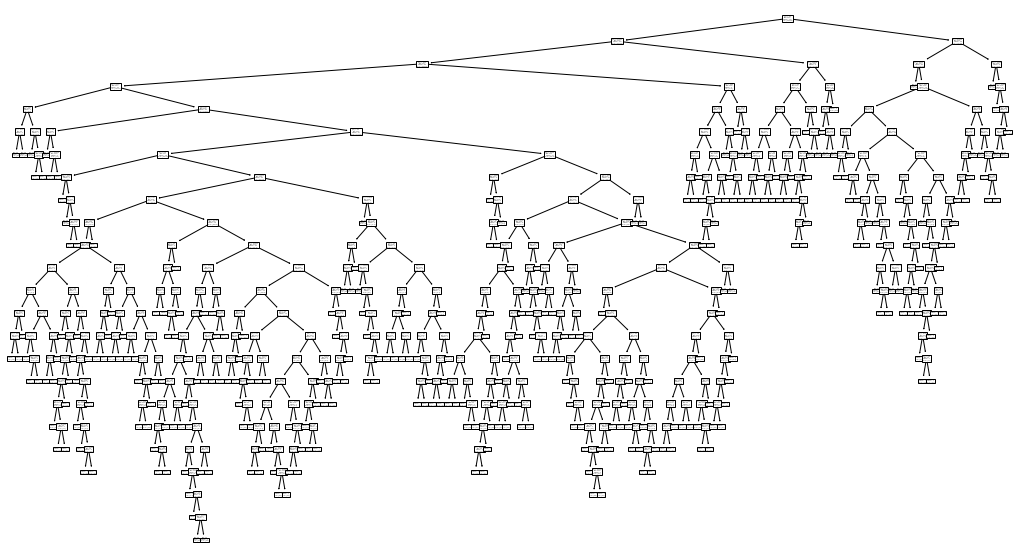

In [56]:
#Результат на тестовой выборке получился лучше, чем на валидационной. Построим одно из деревьев решений для наглядности.

plt.figure(figsize=(18,10))
tree.plot_tree(best_model_RandomForestClassifier.estimators_[1])
plt.show()

## (бонус) Проверьте модели на адекватность

In [57]:
#Проверим лучшие модели средними данными на тестовой выборке
# Будем использовать DummyClassifier в качестве простейшей модели, которую обычно используют для сравнения

strategy = ['most_frequent', 'prior', 'stratified', 'uniform']
ind_vmen = pd.DataFrame()

for i in range(len(strategy)):
    dummy = DummyClassifier(strategy=strategy[i] ,random_state=12345)    
    dummy.fit(features_train, target_train)
    predictions = dummy.predict(features_test)
    result = accuracy_score(target_test, predictions)
    ind_vmen.loc[i,'strategy'] = strategy[i]
    ind_vmen.loc[i,'value'] = result
    ind_vmen.loc[i,'best'] = result_best

ind_vmen

,strategy,value,best
0,most_frequent,0.695179,0.77916
1,prior,0.695179,0.77916
2,stratified,0.578538,0.77916
3,uniform,0.505443,0.77916


### Общий вывод:
1. Мы использовали 3 модели. Лучшие результаты у RandomForestClassifier со следующими гиперпараметрами max_depth=50, n_estimators=12, random_state=12345
2. Значения метрик на валидационной выборке получились выше, чем на тестовой, хоть мы и сбалансировали классы.
3. Проверка лучшей модели на адекватность была осуществлена методом классификации DummyClassifier. Он показал, что качество нашей модели лучше качества самых примитивных вариантов, можно признать модель рабочей. Качество мождели - вполне приемлемо, но можно и лучше 

# <font color='orange'>Рекомендации 🔥</font>
* Анализ данных на python и pandas https://www.youtube.com/watch?v=dd3RcafdOQk&t=82s
* Как обучается Дерево решений https://www.youtube.com/watch?v=j8L07nuns2Y
* Случайный лес https://www.youtube.com/watch?v=EhJPSV-Jr_0
* Линейная регрессия https://www.youtube.com/watch?v=QZJ94igWVxQ&t=49s
* Логистическая регрессия https://www.youtube.com/watch?v=49ck7kCyxr4
* Курс "Введение в машинное обучение" https://stepik.org/course/4852
* В нашем деле нужно быть всегда в курсе всех новинок, новостей и тд, вот тут публикуют новости в области DS: https://www.infoq.com/data-analysis/news/
* Всем аналитикам данных рекомендую книгу Даниела Канемана "Думай медленно, решай быстро"